

# read the Electric Vehicle Population Data dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the dataset
ElectricVehiclePopulationData = pd.read_csv("/content/drive/MyDrive/Electric_Vehicle_Population_Data.csv")
#print the first 5 rows
print(ElectricVehiclePopulationData.head(1))




   VIN (1-10)  County     City State  Postal Code  Model Year    Make  \
0  JTMAB3FV3P  Kitsap  Seabeck    WA      98380.0        2023  TOYOTA   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            42.0   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0        0.0                  35.0       240684006   

                  Vehicle Location        Electric Utility  2020 Census Tract  
0  POINT (-122.8728334 47.5798304)  PUGET SOUND ENERGY INC       5.303509e+10  


#The dataset information


In [54]:
print(ElectricVehiclePopulationData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

#Data Cleaning and Feature Engineering
##1. Document Missing Values:

In [2]:
# Calculate missing values per column
missing_values = ElectricVehiclePopulationData.isnull().sum()

# Find the number of items in the dataset
numItemInDataset = len(ElectricVehiclePopulationData)

# Calculate the percentage of missing values
missing_percentage = (missing_values / numItemInDataset) * 100

# Combine both into a DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Filter out columns with 0 missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]

# Print the number of items in the dataset
print("The number of items in the dataset:", numItemInDataset,'\n')

# Print columns with missing values and their frequencies and percentages
print(missing_data)


The number of items in the dataset: 205439 

                      Missing Values  Percentage
County                             3    0.001460
City                               3    0.001460
Postal Code                        3    0.001460
Model                              1    0.000487
Electric Range                     8    0.003894
Base MSRP                          8    0.003894
Legislative District             442    0.215149
Vehicle Location                   8    0.003894
Electric Utility                   3    0.001460
2020 Census Tract                  3    0.001460


##2. Missing Value Strategies

**#Drop Rows with Missing Values bold text**

In [3]:
# List of columns  want to drop rows with missing values (missing values = 3)
columns_to_check = ['County', 'City', 'Postal Code', 'Electric Utility', '2020 Census Tract', 'Model' ,'Vehicle Location']

# Drop rows where any of the specified columns have missing values
ElectricVehiclePopulationDatacleaned = ElectricVehiclePopulationData.dropna(subset=columns_to_check)

print(ElectricVehiclePopulationDatacleaned.isnull().sum())


VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         8
Base MSRP                                              8
Legislative District                                 439
DOL Vehicle ID                                         0
Vehicle Location                                       0
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64


**fill using** **mean**

In [4]:
# Calculate the mean for 'Electric Range'
meanElectricRange = ElectricVehiclePopulationDatacleaned['Electric Range'].mean()

# Fill missing values in 'Electric Range' with the mean using .loc
ElectricVehiclePopulationDatacleaned.loc[:, 'Electric Range'] = ElectricVehiclePopulationDatacleaned['Electric Range'].fillna(meanElectricRange)

# Calculate the mean for 'Base MSRP'
meanBaseMsrp = ElectricVehiclePopulationDatacleaned['Base MSRP'].mean()

# Fill missing values in 'Base MSRP' with the mean using .loc
ElectricVehiclePopulationDatacleaned.loc[:, 'Base MSRP'] = ElectricVehiclePopulationDatacleaned['Base MSRP'].fillna(meanBaseMsrp)

# Check the sum of null values after filling
print(ElectricVehiclePopulationDatacleaned.isnull().sum())


VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 439
DOL Vehicle ID                                         0
Vehicle Location                                       0
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64


# **fill Legislative District using median**

In [5]:
# Calculate the median for 'Legislative District'
medianLegislativeDistrict = ElectricVehiclePopulationDatacleaned['Legislative District'].median()

# Fill missing values in 'Legislative District' with the median using .loc
ElectricVehiclePopulationDatacleaned.loc[:, 'Legislative District'] = ElectricVehiclePopulationDatacleaned['Legislative District'].fillna(medianLegislativeDistrict)

# Check the sum of null values after filling
print(ElectricVehiclePopulationDatacleaned.isnull().sum())


VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


Initial Summary Statistics (Before Imputation):

         Postal Code     Model Year  Electric Range      Base MSRP  \
count  205436.000000  205439.000000   205431.000000  205431.000000   
mean    98177.971870    2020.960363       52.164342     922.670532   
std      2419.037479       2.989059       88.075859    7761.753602   
min      1731.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2019.000000        0.000000       0.000000   
50%     98125.000000    2022.000000        0.000000       0.000000   
75%     98372.000000    2023.000000       48.000000       0.000000   
max     99577.000000    2025.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         204997.000000    2.054390e+05       2.054360e+05  
mean              28.970848    2.277156e+08       5.297704e+10  
std               14.910052    7.205737e+07       1.588435e+09  
min                1.000000    4.469000e+03       1.001020e+

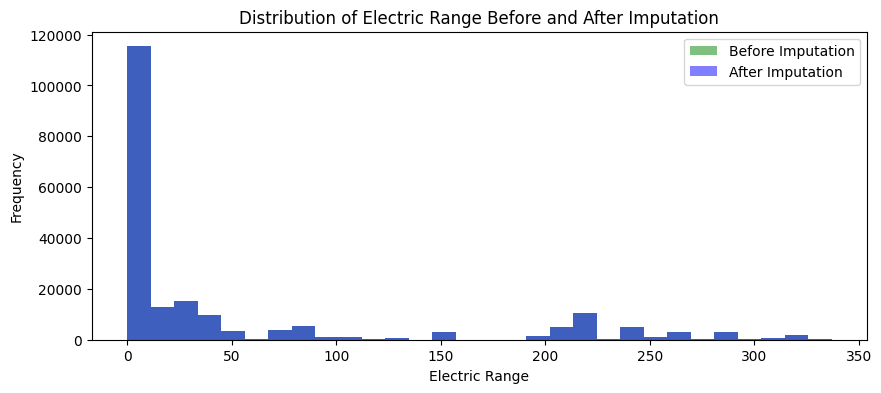

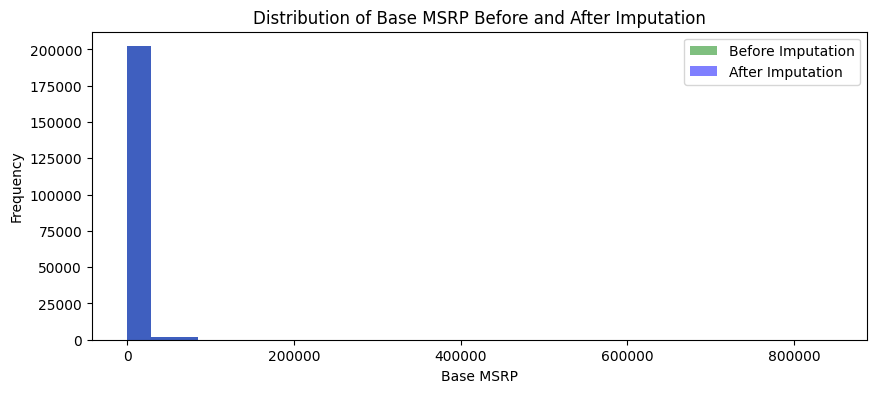

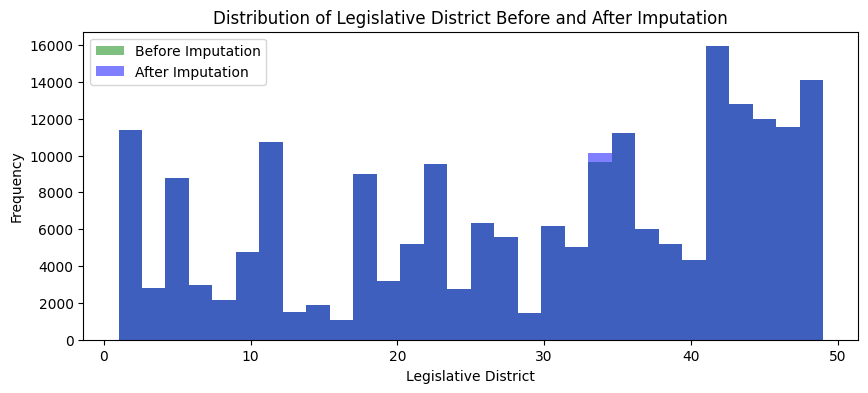

In [6]:
import matplotlib.pyplot as plt

# Initial Summary Statistics and Correlation Matrix
print("Initial Summary Statistics (Before Imputation):\n")
print(ElectricVehiclePopulationData.describe())

# Filter to only numeric columns
numeric_data = ElectricVehiclePopulationData.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix for numeric data
initial_correlation = numeric_data.corr()
print("Initial Correlation Matrix:\n")
print(initial_correlation)

# Post-Imputation Summary Statistics and Correlation Matrix
print("\n\nPost-Imputation Summary Statistics:\n")
print(ElectricVehiclePopulationDatacleaned.describe())

# Filter numeric columns in the post-imputation DataFrame
post_imputation_numeric_data = ElectricVehiclePopulationDatacleaned.select_dtypes(include=['float64', 'int64'])
post_imputation_correlation = post_imputation_numeric_data.corr()
print("\n\nPost-Imputation Correlation Matrix:\n")
print(post_imputation_correlation)

# Columns for visualization
imputed_columns = ['Electric Range', 'Base MSRP', 'Legislative District']

# Plot histograms for each imputed column before and after imputation
for col in imputed_columns:
    plt.figure(figsize=(10, 4))
    plt.hist(ElectricVehiclePopulationData[col].dropna(), bins=30, alpha=0.5, label="Before Imputation", color='green')
    plt.hist(ElectricVehiclePopulationDatacleaned[col], bins=30, alpha=0.5, label="After Imputation", color='blue')
    plt.title(f'Distribution of {col} Before and After Imputation')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


## Normalization and  numerical features and applay one hot encoding for categorical features

In [60]:
# Identify categorical columns

df = ElectricVehiclePopulationDatacleaned.copy()

categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')


In [10]:

# Identify numerical columns first for normalization
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Print the numerical column names
print(numerical_columns.tolist())


['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

# Assuming 'ElectricVehiclePopulationData' is your DataFrame
df = ElectricVehiclePopulationData.copy()


# Initialize scalers
min_max_scaler = MinMaxScaler()

# Normalize using Min-Max scaling
df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])


# Now initialize the OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')  # Set sparse=False to get a dense array

# Columns that you want to apply one-hot encoding to
columns_to_encode = ['County', 'City', 'State', 'Make', 'Model','Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location','Electric Utility']

# Fit the encoder on the specified columns
enc.fit(df[columns_to_encode])

# Apply one-hot encoding and convert the result to a dense array
df_encoded = enc.transform(df[columns_to_encode]).toarray()

# Copy the original DataFrame to store the one-hot encoded data
df_oneHotencoded = df.copy()

# Create column names for the encoded columns
encoded_columns = [f'{col}_{value}' for col, values in zip(columns_to_encode, enc.categories_) for value in values]

# Add the one-hot encoded columns to the new DataFrame
df_oneHotencoded[encoded_columns] = df_encoded

# Optionally, drop the original categorical columns if they are no longer needed
df_oneHotencoded.drop(columns_to_encode, axis=1, inplace=True)

# Display the first few rows of the normalized and encoded DataFrame
print("Normalized and One-Hot Encoded DataFrame:")
print(df_oneHotencoded.head())


In [15]:
# Print all column names in the DataFrame after encoding
print("All column names in the encoded DataFrame:")
print(df_oneHotencoded.columns.tolist())


All column names in the encoded DataFrame:
['VIN (1-10)', 'Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract', 'County_Ada', 'County_Adams', 'County_Alameda', 'County_Albemarle', 'County_Alexandria', 'County_Allen', 'County_Anchorage', 'County_Anne Arundel', 'County_Arapahoe', 'County_Asotin', 'County_Atlantic', 'County_Autauga', 'County_Bay', 'County_Beaufort', 'County_Bell', 'County_Benton', 'County_Berkeley', 'County_Bexar', 'County_Brevard', 'County_Brown', 'County_Burlington', 'County_Caddo', 'County_Calvert', 'County_Cameron', 'County_Carroll', 'County_Champaign', 'County_Charles', 'County_Charleston', 'County_Chelan', 'County_Chesapeake', 'County_Chesterfield', 'County_Christian', 'County_Churchill', 'County_Clallam', 'County_Clark', 'County_Collin', 'County_Columbia', 'County_Contra Costa', 'County_Cook', 'County_Cowlitz', 'County_Cumberland', 'County_Currituck', 'County_Cuyahoga', 'County_Davis', 'County_DeK

## Descriptive Statistics: Calculate summary statistics (mean, median, standard deviation) for numerical features

In [12]:

# Calculate mean, median, and standard deviation for the specified numerical features
mean_values = df_oneHotencoded[numerical_columns].mean()
median_values = df_oneHotencoded[numerical_columns].median()
std_values = df_oneHotencoded[numerical_columns].std()

# Create a DataFrame to summarize the statistics
descriptive_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_values
})

# Print the descriptive statistics
print("Descriptive Statistics for specified numerical features:")
print(descriptive_stats)


Descriptive Statistics for specified numerical features:
                          Mean    Median  Standard Deviation
Postal Code           0.985702  0.985160            0.024723
Model Year            0.855727  0.892857            0.106752
Electric Range        0.154790  0.000000            0.261353
Base MSRP             0.001092  0.000000            0.009186
Legislative District  0.582726  0.666667            0.310626
DOL Vehicle ID        0.475140  0.497094            0.150354
2020 Census Tract     0.944675  0.945693            0.028870


## Spatial Distribution: Visualize the spatial distribution of EVs across locations

In [13]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Extract longitude and latitude
df['Vehicle Location'] = df['Vehicle Location'].astype(str)

def extract_coordinates(location):
    try:
        lon, lat = location.split('(')[1].replace(')', '').split()
        return float(lon), float(lat)
    except Exception as e:
        return None, None

# Apply the coordinate extraction function
df['Longitude'], df['Latitude'] = zip(*df['Vehicle Location'].apply(extract_coordinates))

# Sample the data to enhance processing speed
df_samp = df.sample(n=1000, random_state=42)

# Define a color mapping for various vehicle makes
color_mapping = {
    'Make_Tesla': 'red',
    'Make_Nissan': 'blue',
    'Make_Chevrolet': 'green',
    'Make_BMW': 'purple',
    'Make_Audi': 'orange',
    'Make_MITSUBISHI': 'black',
    'Other' : 'white'
}

# Latitude and Longitude of Washington state
centerlized = [47.7511, -120.7401]
EVs_across_locations = folium.Map(location=centerlized, zoom_start=7)

# Add a marker cluster to enhance visualization
markerCluster = MarkerCluster().add_to(EVs_across_locations)

# Add color-coded markers based on the 'Make' column
for index, row in df_samp.iterrows():
    # Check which make columns are present and assign the appropriate color
    vehicle_make = [make for make in color_mapping.keys() if row.get(make, 0) > 0]
    MarkerColor = color_mapping.get(vehicle_make[0], 'red') if vehicle_make else 'black'

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Make']} {row['Model']} ({row['Model Year']})",
        icon=folium.Icon(color=MarkerColor)
    ).add_to(markerCluster)

EVs_across_locations


## Model Popularity: Analyze the popularity of different EV models (categoricaldata) andidentify any trends

Top 10 Most Popular EV Models:
Model
MODEL Y           43436
MODEL 3           32113
LEAF              13488
MODEL S            7881
BOLT EV            6726
MODEL X            6248
VOLT               4828
ID.4               4564
MUSTANG MACH-E     4154
WRANGLER           4046
Name: count, dtype: int64

Total unique EV models: 152

Most popular model accounts for 21.14% of the total EVs.

Percentage of total EVs for each of the top 10 models:
Model
MODEL Y           21.143942
MODEL 3           15.632089
LEAF               6.565740
MODEL S            3.836343
BOLT EV            3.274108
MODEL X            3.041425
VOLT               2.350192
ID.4               2.221681
MUSTANG MACH-E     2.022100
WRANGLER           1.969527
Name: count, dtype: float64


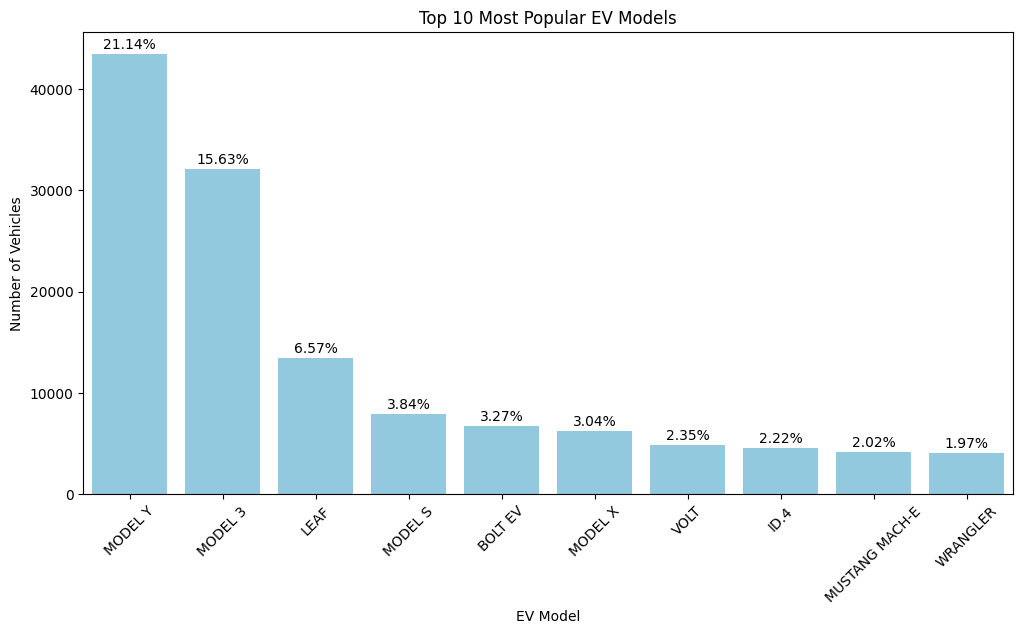

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the popularity of different EV models
model_counts = ElectricVehiclePopulationDatacleaned['Model'].value_counts()
print("Top 10 Most Popular EV Models:")
print(model_counts.head(10))

# Analyze overall trends
total_models = len(model_counts)
most_popular_model_percentage = (model_counts.iloc[0] / model_counts.sum()) * 100
print(f"\nTotal unique EV models: {total_models}")
print(f"\nMost popular model accounts for {most_popular_model_percentage:.2f}% of the total EVs.")

# Calculate the percentage for each of the top 10 models
total_vehicles = model_counts.sum()
top_8_models_percentage = (model_counts.head(10) / total_vehicles) * 100
print("\nPercentage of total EVs for each of the top 10 models:")
print(top_8_models_percentage)

# Visualize the top 10 most popular models
plt.figure(figsize=(12, 6))
sns.barplot(x=model_counts.head(10).index, y=model_counts.head(10).values, color="skyblue")
plt.title("Top 10 Most Popular EV Models")
plt.xlabel("EV Model")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)

# Annotate each bar with the percentage
for i, (count, percentage) in enumerate(zip(model_counts.head(10).values, top_8_models_percentage)):
    plt.text(i, count + 500, f"{percentage:.2f}%", ha='center', color='black')

plt.show()


Top EV Models by Manufacturer:
                     Make                     Model  Counts
0                   ACURA                       ZDX      32
1              ALFA ROMEO                    TONALE      77
2                    AUDI                    E-TRON    1066
14         AZURE DYNAMICS  TRANSIT CONNECT ELECTRIC       4
15                BENTLEY                  BENTAYGA       3
17                    BMW                        X5    2597
32               CADILLAC                     LYRIQ     657
35              CHEVROLET                   BOLT EV    6726
43               CHRYSLER                  PACIFICA    3693
44                  DODGE                    HORNET     665
45                   FIAT                       500     780
47                 FISKER                     OCEAN     173
49                   FORD            MUSTANG MACH-E    4154
57                GENESIS                      GV60     182
60                    GMC          HUMMER EV PICKUP      34
61       

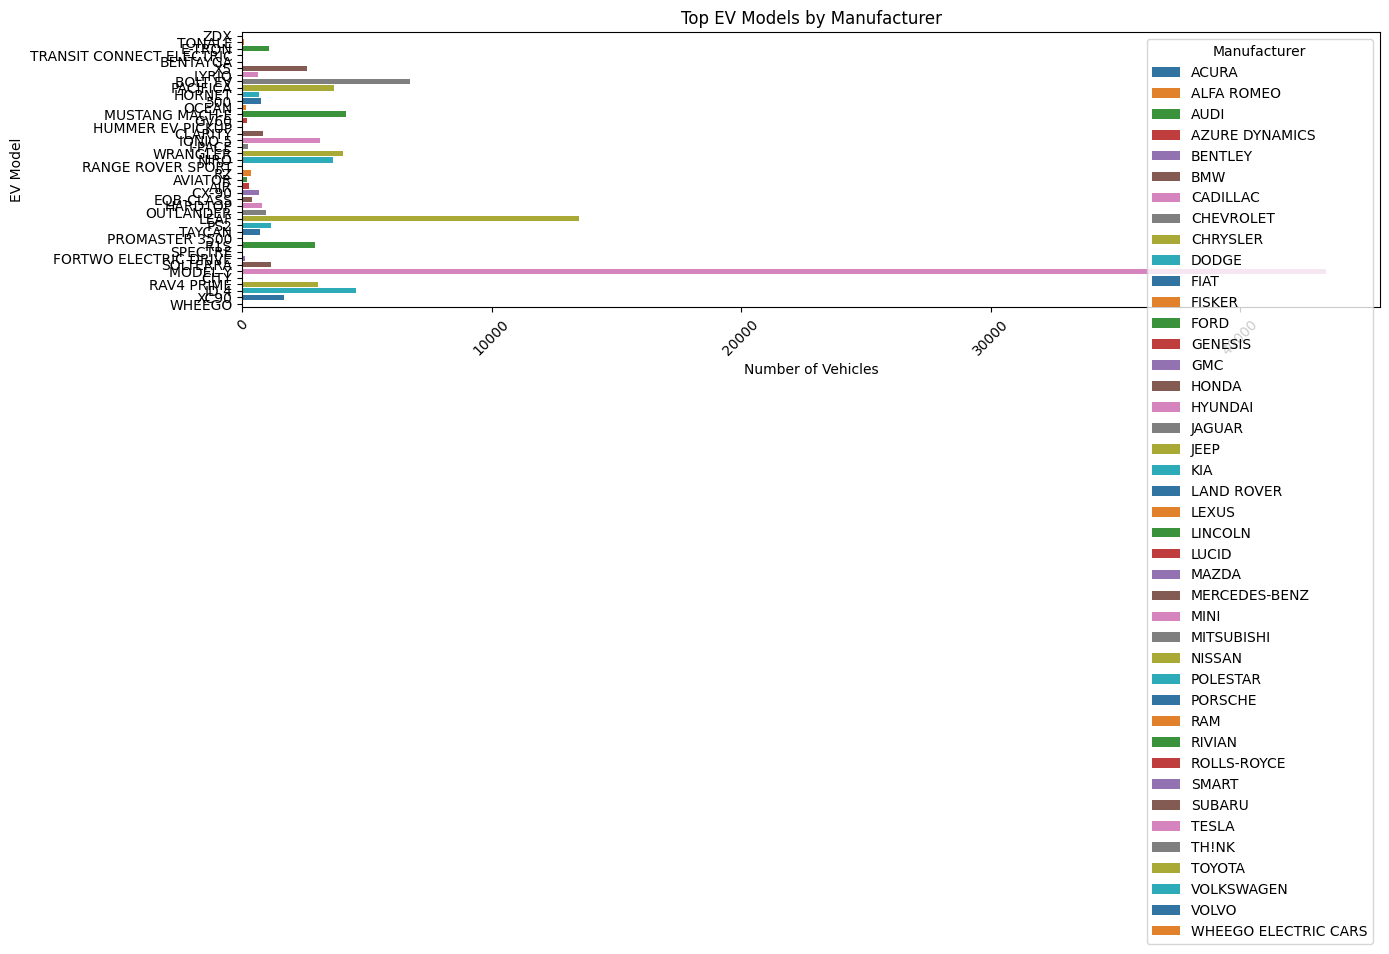


Manufacturer Popularity:
Make
TESLA                   90316
CHEVROLET               15112
NISSAN                  14525
FORD                    10840
KIA                      9103
BMW                      8480
TOYOTA                   7945
HYUNDAI                  5781
RIVIAN                   5679
VOLKSWAGEN               5638
JEEP                     5412
VOLVO                    4877
AUDI                     3918
CHRYSLER                 3693
MERCEDES-BENZ            1930
SUBARU                   1238
PORSCHE                  1232
POLESTAR                 1162
HONDA                    1078
MITSUBISHI               1018
MINI                     1015
FIAT                      799
LEXUS                     754
CADILLAC                  745
MAZDA                     711
DODGE                     665
LINCOLN                   299
LUCID                     289
GENESIS                   266
SMART                     248
JAGUAR                    243
FISKER                    186
ALFA ROME

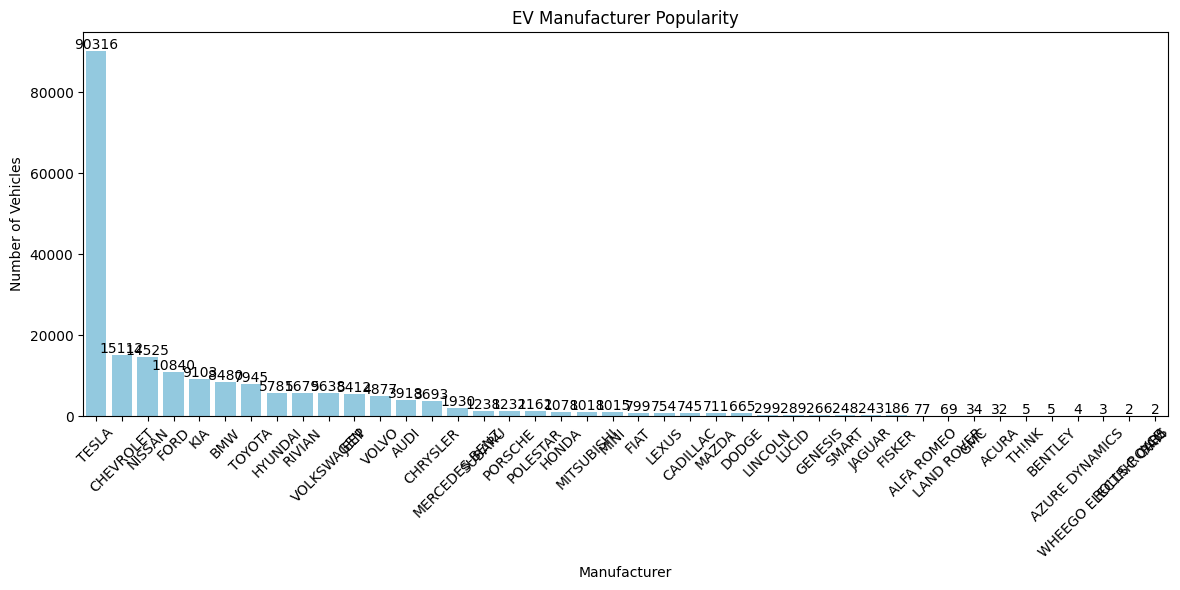

In [32]:
# Group models by their manufacturers and count the occurrences of each model
manufacturer_model_counts = ElectricVehiclePopulationDatacleaned.groupby('Make')['Model'].value_counts().reset_index(name='Counts')

# Get the top models for each manufacturer
top_models_per_manufacturer = manufacturer_model_counts.loc[manufacturer_model_counts.groupby('Make')['Counts'].idxmax()]

# Print the top models for each manufacturer
print("Top EV Models by Manufacturer:")
print(top_models_per_manufacturer)

# Visualize the top models for each manufacturer
plt.figure(figsize=(14, 7))
sns.barplot(data=top_models_per_manufacturer, x='Counts', y='Model', hue='Make', dodge=False, palette='tab10')
plt.title("Top EV Models by Manufacturer")
plt.xlabel("Number of Vehicles")
plt.ylabel("EV Model")
plt.legend(title='Manufacturer', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional analysis for overall manufacturer popularity
manufacturer_counts = ElectricVehiclePopulationDatacleaned['Make'].value_counts()
print("\nManufacturer Popularity:")
print(manufacturer_counts)

# Visualize manufacturer popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values, color="skyblue")
plt.title("EV Manufacturer Popularity")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)

# Annotate each bar with the counts
for i, count in enumerate(manufacturer_counts.values):
    plt.text(i, count + 500, str(count), ha='center', color='black')

plt.tight_layout()
plt.show()


## the relationship between every pair of numeric features

Correlation Matrix:
                      Postal Code  Model Year  Electric Range  Base MSRP  \
Postal Code              1.000000   -0.001019       -0.001556  -0.002685   
Model Year              -0.001019    1.000000       -0.507739  -0.231280   
Electric Range          -0.001556   -0.507739        1.000000   0.113545   
Base MSRP               -0.002685   -0.231280        0.113545   1.000000   
Legislative District    -0.410291   -0.015640        0.019888   0.010440   
DOL Vehicle ID           0.006023    0.200597       -0.131015  -0.037803   
2020 Census Tract        0.496433    0.005724       -0.001186   0.000878   

                      Legislative District  DOL Vehicle ID  2020 Census Tract  
Postal Code                      -0.410291        0.006023           0.496433  
Model Year                       -0.015640        0.200597           0.005724  
Electric Range                    0.019888       -0.131015          -0.001186  
Base MSRP                         0.010440       -0

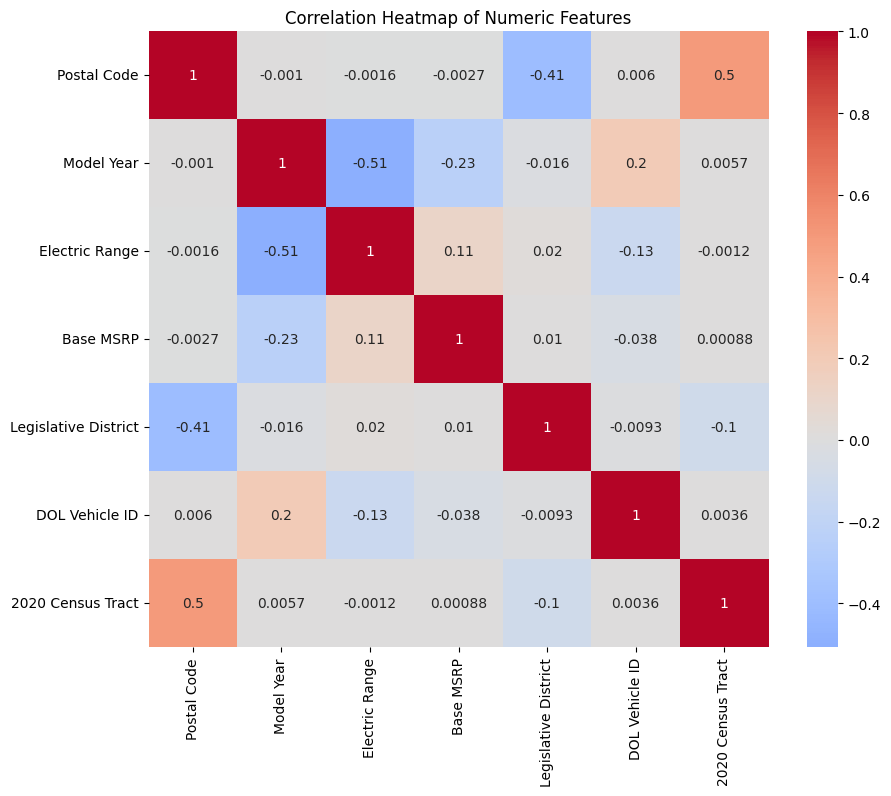

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
                   'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

# Calculate the correlation matrix
correlation_matrix = df_oneHotencoded[numeric_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


##Data Exploration Visualizations: Create various visualizations (e.g., histograms, scatter plots, boxplots) to explore the relationships between features.

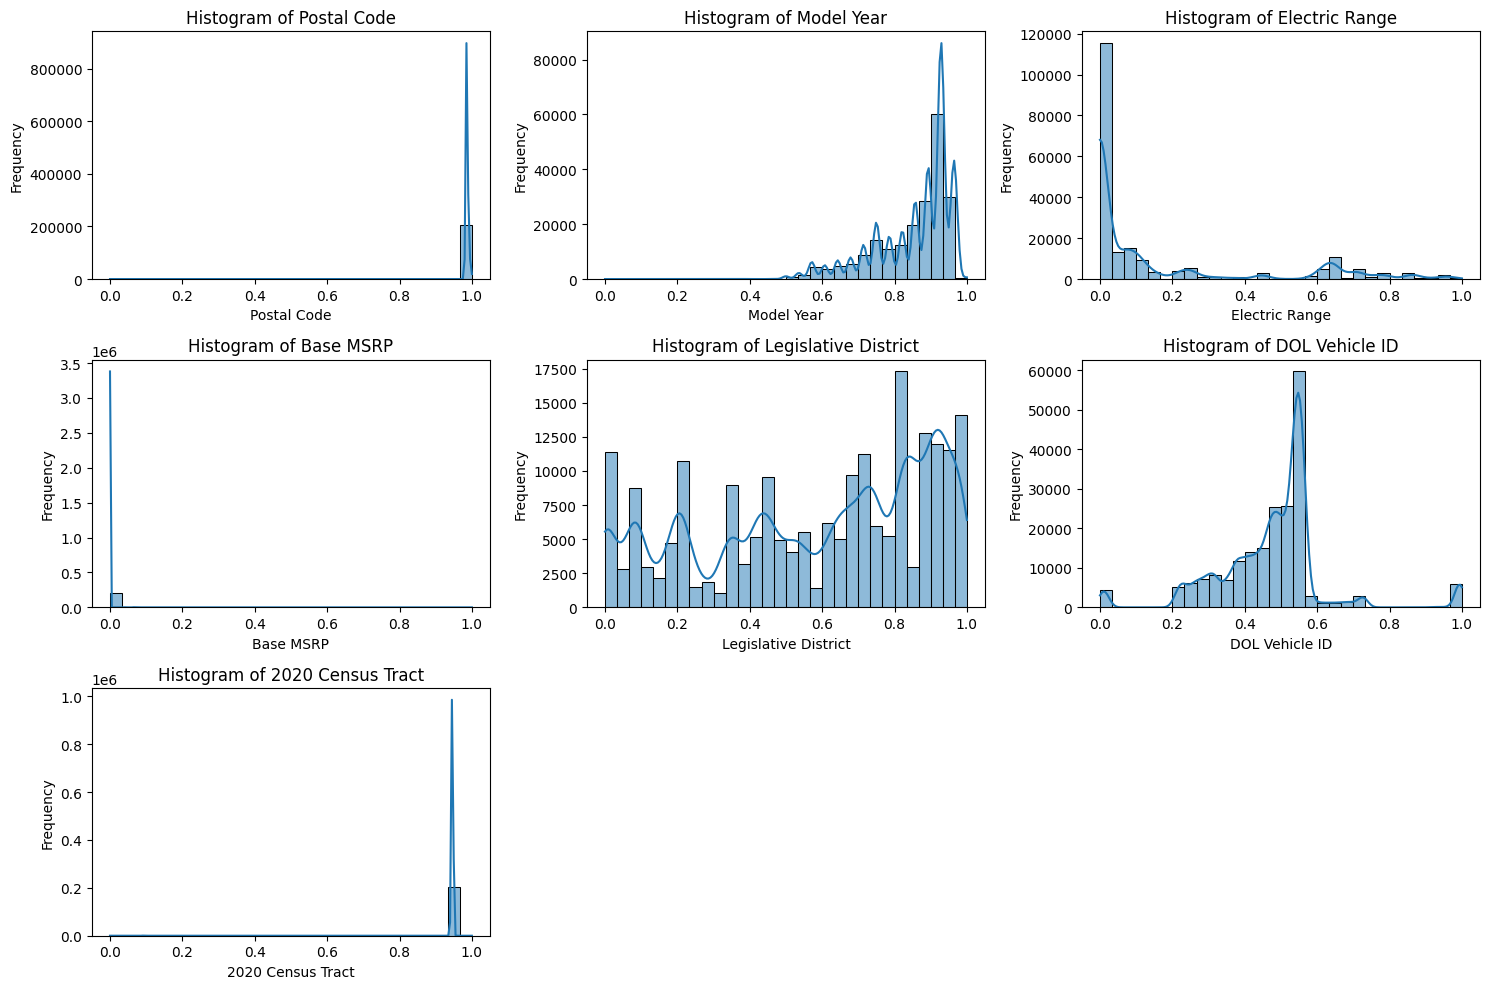

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# List of numerical columns to plot histograms for
numerical_columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
                     'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

# Plot histograms for numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_oneHotencoded[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Count Plot of Make and Electric Vehicle Type

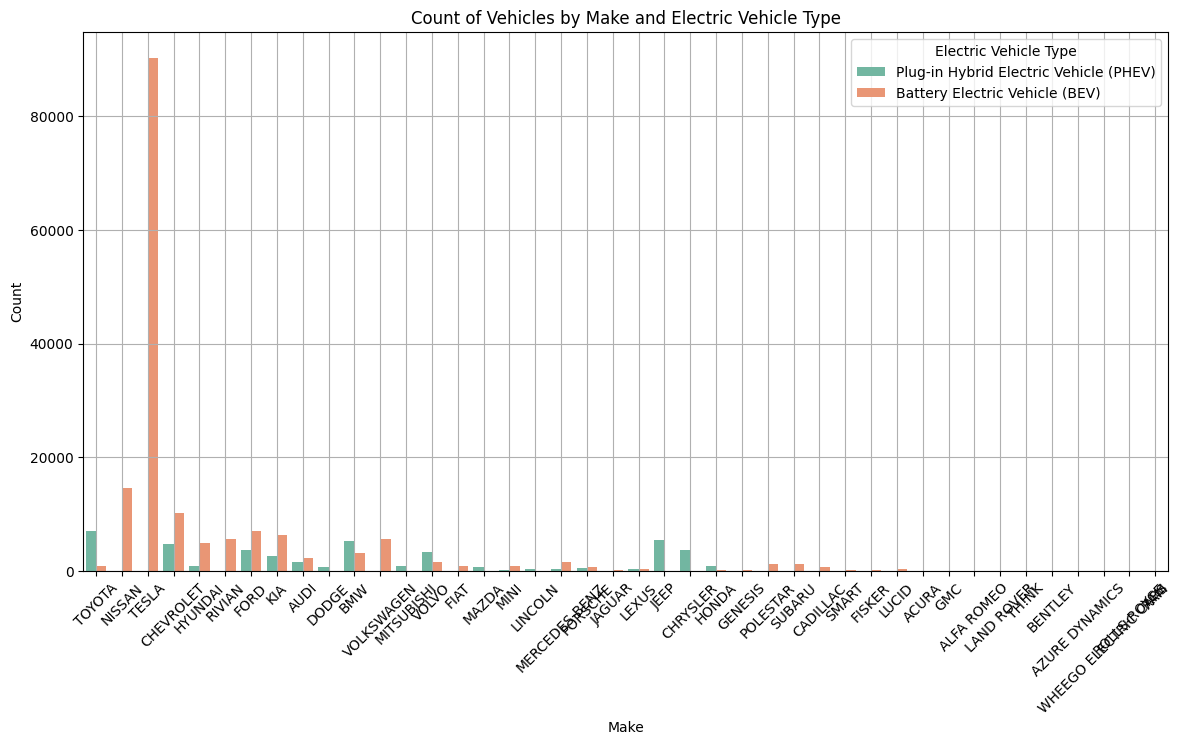

In [38]:
plt.figure(figsize=(14, 7))
sns.countplot(data=ElectricVehiclePopulationDatacleaned, x='Make', hue='Electric Vehicle Type', palette='Set2')
plt.title('Count of Vehicles by Make and Electric Vehicle Type')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Electric Vehicle Type')
plt.grid()
plt.show()


##Correlation Matrix Heatmap

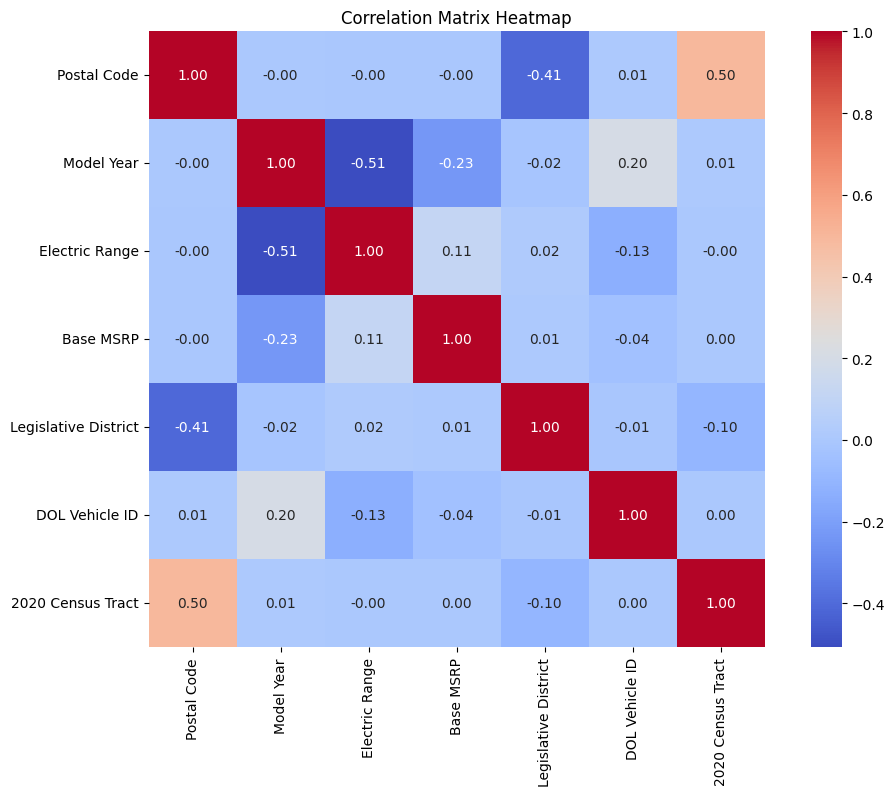

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


## Bar plot show the avg electric range by make

<ipython-input-42-874cc11d74a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_range_by_make.sort_values('Electric Range', ascending=False), x='Make', y='Electric Range', palette='Set2')


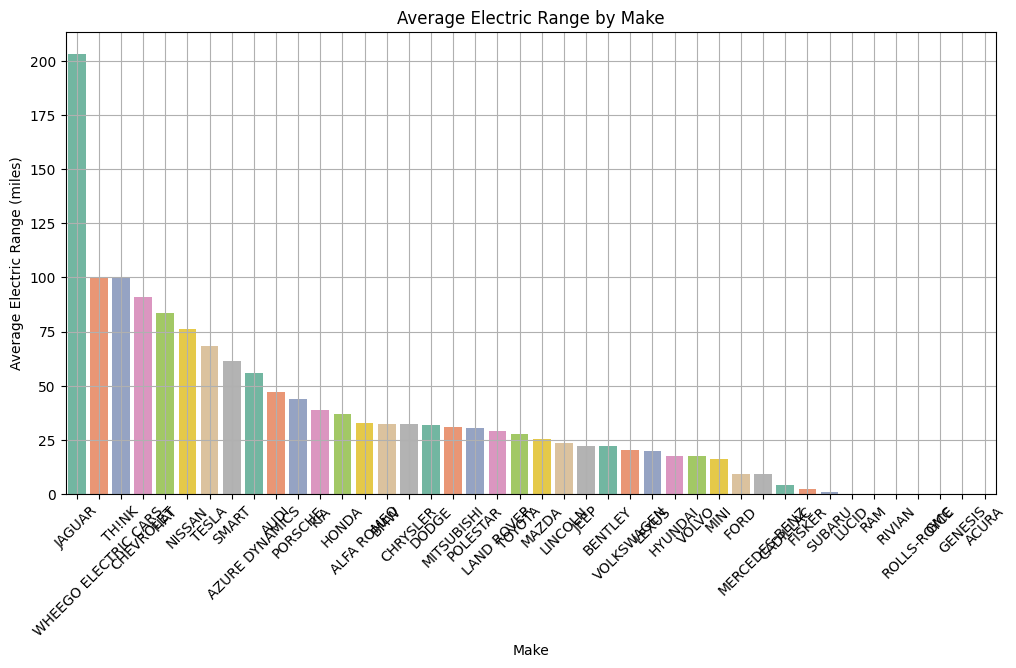

In [42]:
avg_range_by_make = ElectricVehiclePopulationDatacleaned.groupby('Make')['Electric Range'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_range_by_make.sort_values('Electric Range', ascending=False), x='Make', y='Electric Range', palette='Set2')
plt.title('Average Electric Range by Make')
plt.xlabel('Make')
plt.ylabel('Average Electric Range (miles)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


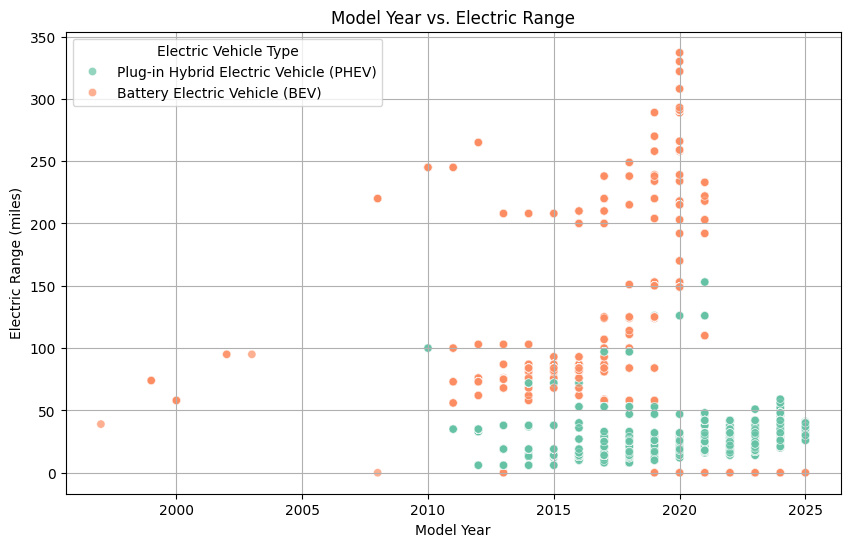

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Model Year', y='Electric Range', data=ElectricVehiclePopulationDatacleaned, hue='Electric Vehicle Type', palette='Set2', alpha=0.7)
plt.title('Model Year vs. Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.grid()
plt.legend(title='Electric Vehicle Type')
plt.show()


## bar plot of Count of Vehicles by Electric Vehicle Type


Popularity of Electric Vehicle Types:
Electric Vehicle Type
Battery Electric Vehicle (BEV)            161534
Plug-in Hybrid Electric Vehicle (PHEV)     43896
Name: count, dtype: int64


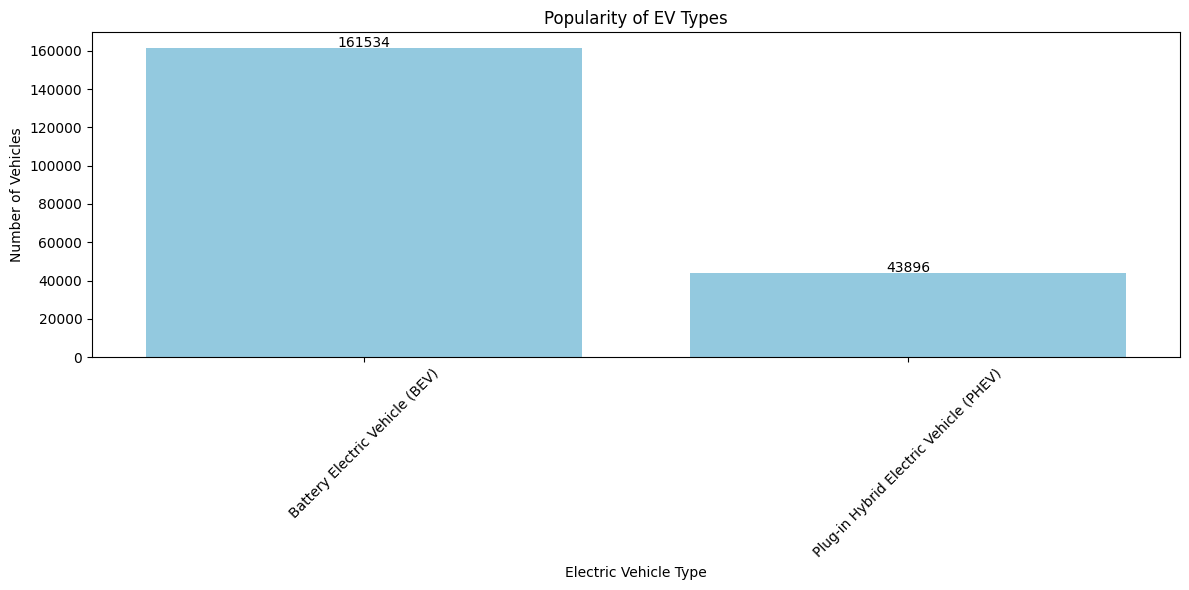

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Additional analysis for overall electric vehicle type popularity
ev_type_counts = ElectricVehiclePopulationDatacleaned['Electric Vehicle Type'].value_counts()
print("\nPopularity of Electric Vehicle Types:")
print(ev_type_counts)

# Visualize electric vehicle type popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=ev_type_counts.index, y=ev_type_counts.values, color="skyblue")
plt.title("Popularity of EV Types")
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)

# Annotate each bar with the counts
for i, count in enumerate(ev_type_counts.values):
    plt.text(i, count + 500, str(count), ha='center', color='black')

plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
import plotly.express as px

# Count occurrences of each Electric Vehicle Type
ev_type_counts = ElectricVehiclePopulationDatacleaned['Electric Vehicle Type'].value_counts().reset_index()
ev_type_counts.columns = ['Electric Vehicle Type', 'Count']

# Plotting with a pie chart
fig = px.pie(ev_type_counts, names='Electric Vehicle Type', values='Count',
             title="Electric Vehicle Type Popularity")
fig.show()


## Box Plot of Electric Range by Legislative District

<ipython-input-49-051e5282c498>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Legislative District', y='Electric Range', data=ElectricVehiclePopulationDatacleaned, palette='Set2')


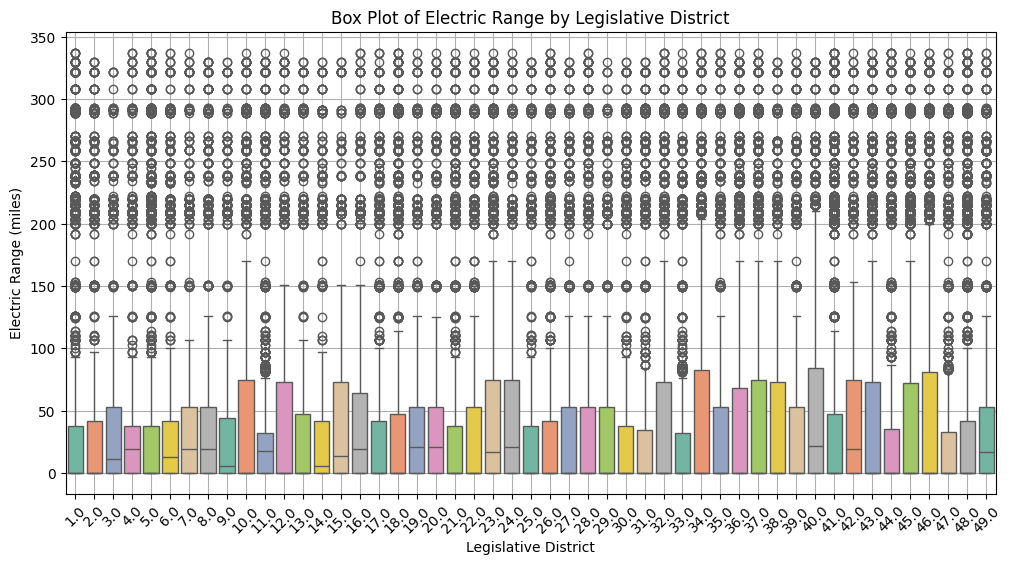

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Legislative District', y='Electric Range', data=ElectricVehiclePopulationDatacleaned, palette='Set2')
plt.title('Box Plot of Electric Range by Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


##Distribution of Electriv Range

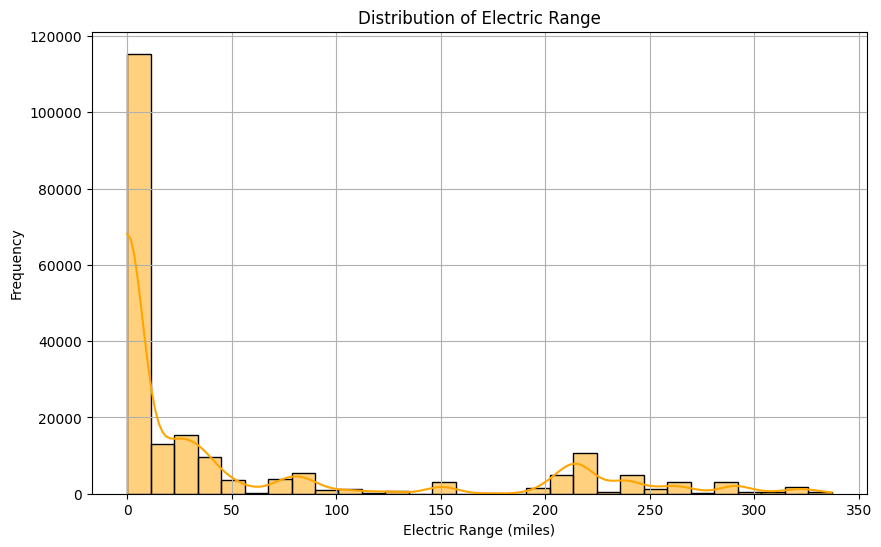

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(ElectricVehiclePopulationDatacleaned['Electric Range'], bins=30, kde=True, color='orange')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


##Comparative Visualization: Compare the distribution of EVs across different locations (cities, counties) using bar charts or stacked bar charts.

<ipython-input-48-c1af8d04c6cd>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




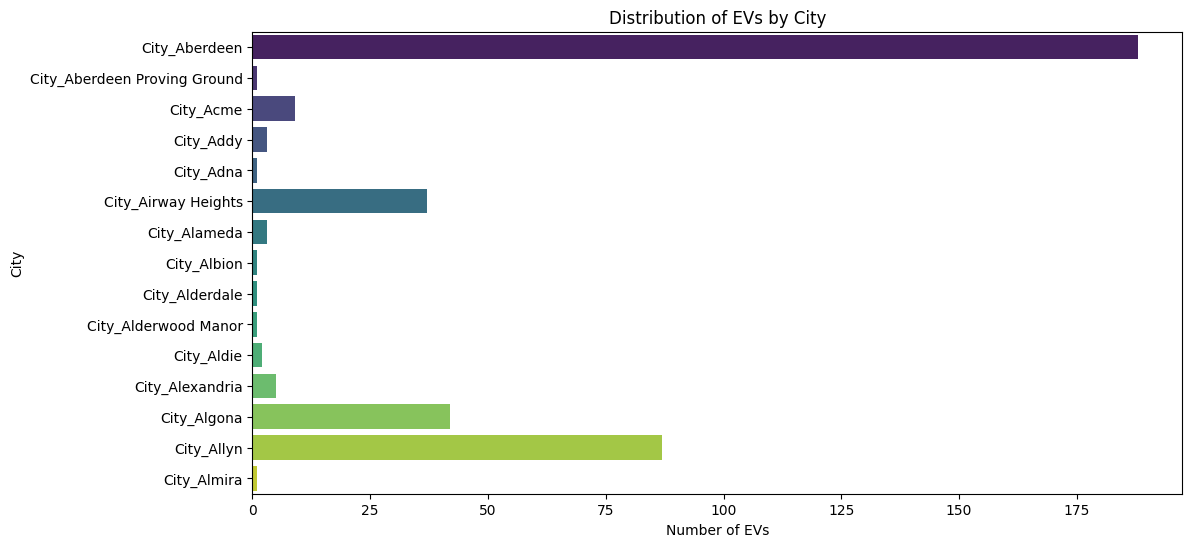

<ipython-input-48-c1af8d04c6cd>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




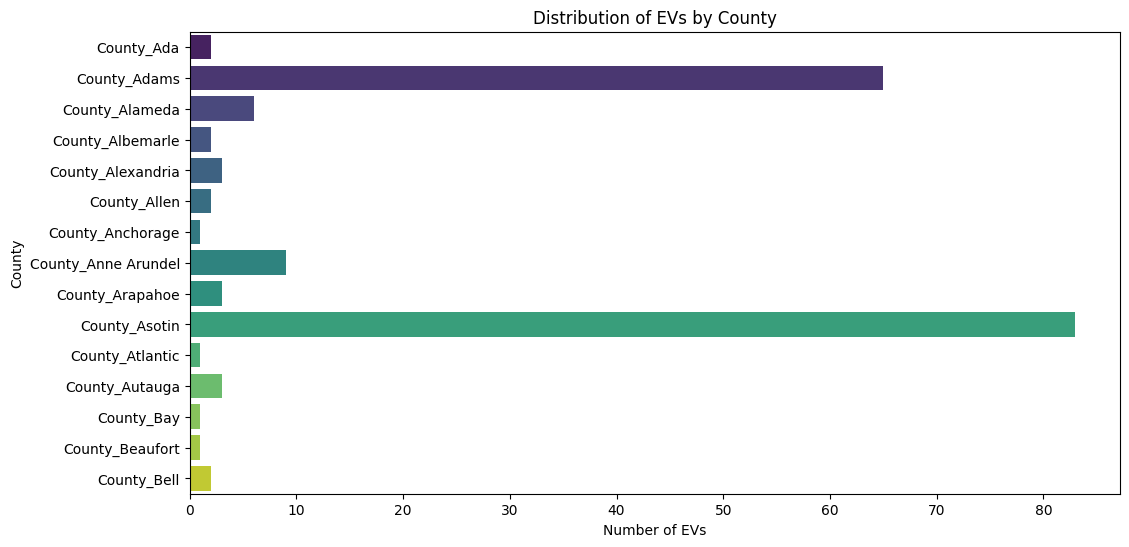

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

city_cols = [col for col in df_oneHotencoded.columns if col.startswith('City_')]
city_counts = df_oneHotencoded[city_cols].sum().reset_index()
city_counts.columns = ['City', 'Number of EVs']

# Count the number of EVs in each county using encoded columns
county_cols = [col for col in df_oneHotencoded.columns if col.startswith('County_')]
county_counts = df_oneHotencoded[county_cols].sum().reset_index()
county_counts.columns = ['County', 'Number of EVs']

# Bar Chart for EV Distribution by City
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of EVs', y='City', data=city_counts.head(15), palette='viridis')
plt.title('Distribution of EVs by City')
plt.xlabel('Number of EVs')
plt.ylabel('City')
plt.show()

# Bar Chart for EV Distribution by County
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of EVs', y='County', data=county_counts.head(15), palette='viridis')
plt.title('Distribution of EVs by County')
plt.xlabel('Number of EVs')
plt.ylabel('County')
plt.show()


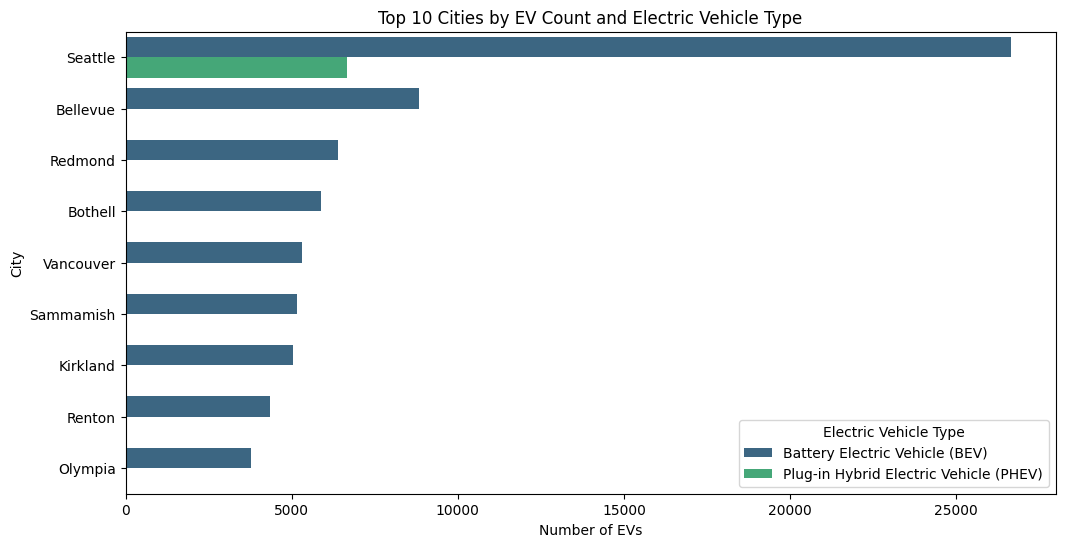

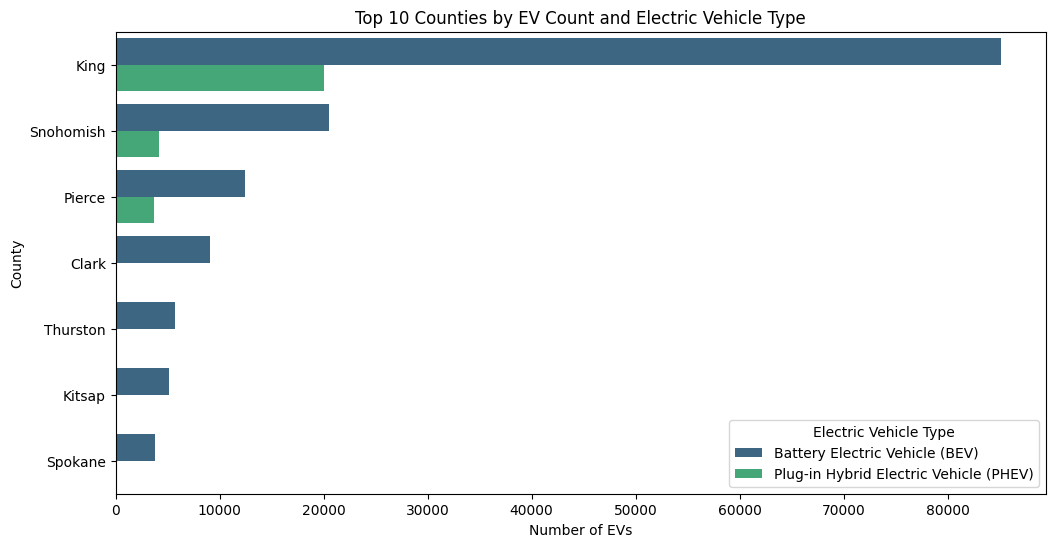

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EV Distribution by City and Electric Vehicle Type
city_ev_counts = ElectricVehiclePopulationDatacleaned.groupby(['City', 'Electric Vehicle Type']).size().reset_index(name='Number of EVs')
top_10_cities = city_ev_counts.nlargest(10, 'Number of EVs')

# Plot for EV Distribution by City
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of EVs', y='City', hue='Electric Vehicle Type', data=top_10_cities, palette='viridis')
plt.title('Top 10 Cities by EV Count and Electric Vehicle Type')
plt.xlabel('Number of EVs')
plt.ylabel('City')
plt.legend(title='Electric Vehicle Type')
plt.show()

# EV Distribution by County and Electric Vehicle Type
county_ev_counts = ElectricVehiclePopulationDatacleaned.groupby(['County', 'Electric Vehicle Type']).size().reset_index(name='Number of EVs')
top_10_counties = county_ev_counts.nlargest(10, 'Number of EVs')

# Plot for EV Distribution by County
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of EVs', y='County', hue='Electric Vehicle Type', data=top_10_counties, palette='viridis')
plt.title('Top 10 Counties by EV Count and Electric Vehicle Type')
plt.xlabel('Number of EVs')
plt.ylabel('County')
plt.legend(title='Electric Vehicle Type')
plt.show()


##Model Popualrity by year

In [13]:
import pandas as pd
import plotly.express as px


# Select relevant columns directly
df_model_year = ElectricVehiclePopulationDatacleaned[['Model Year', 'Model']]

# Count occurrences of each model by year
model_counts = df_model_year.groupby('Model Year')['Model'].value_counts().unstack(fill_value=0)

# Melt data for easier plotting
model_counts = model_counts.reset_index().melt(id_vars="Model Year", var_name="Model", value_name="Count")

# Plot model popularity by year
fig = px.line(model_counts, x='Model Year', y='Count', color='Model', title="EV Model Popularity Over Time")
fig.show()

In [10]:
import pandas as pd
import plotly.express as px

# Group the unencoded dataset by 'Model Year' and 'Model' to get counts per model per year
df_model_year = ElectricVehiclePopulationDatacleaned.groupby(['Model Year', 'Model']).size().reset_index(name='Count')

# Pivot the data to get each model's counts across years
df_pivot = df_model_year.pivot(index='Model Year', columns='Model', values='Count').fillna(0)

# Calculate year-over-year growth for each model
model_growth = df_pivot.pct_change() * 100
model_growth = model_growth.reset_index().melt(id_vars="Model Year", var_name="Model", value_name="Growth (%)")

# Filter to include only positive growth rates
model_growth_positive = model_growth[model_growth['Growth (%)'] > 0]

# Plot growth trends
fig = px.bar(model_growth_positive, x='Model Year', y='Growth (%)', color='Model', title="Growth Rate of EV Models Over Time")
fig.show()

# Mapping of 'Model Year' to normalized values (optional step if you need normalization data)
year_mapping = model_growth_positive.groupby('Model Year')['Growth (%)'].mean().to_dict()




In [11]:
import pandas as pd
import plotly.express as px

# Select the relevant columns
df_ev_type_year = ElectricVehiclePopulationDatacleaned[['Model Year', 'Electric Vehicle Type']]

# Count occurrences of each EV type by year
ev_type_counts = df_ev_type_year.groupby('Model Year')['Electric Vehicle Type'].value_counts().unstack(fill_value=0)

# Melt data for easier plotting
ev_type_counts = ev_type_counts.reset_index().melt(id_vars="Model Year", var_name="Electric Vehicle Type", value_name="Count")

# Plot EV type popularity by year
fig = px.line(ev_type_counts, x='Model Year', y='Count', color='Electric Vehicle Type', title="Electric Vehicle Type Popularity Over Time")
fig.show()
